In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\chd78002\\OneDrive - Groupe IPSEN\\Documents\\GIT-PROJECTS\\Exam_Datagong_Doliveux\\notebooks'

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("../data/thelook_fr_women_2023_2024.csv")

In [5]:
# Affichez les dimensions du DataFrame
print(f"La base fait {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base fait 1679 lignes et 20 colonnes


In [6]:
# Affichez les 5 premières lignes
df.head()


,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Pol...,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


In [7]:
# Utilisation de la méthode info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1679 non-null   int64  
 1   order_item_id     1679 non-null   int64  
 2   product_id        1679 non-null   int64  
 3   item_created_at   1679 non-null   object 
 4   item_status       1679 non-null   object 
 5   sale_price        1679 non-null   float64
 6   cost              1679 non-null   float64
 7   category          1679 non-null   object 
 8   department        1679 non-null   object 
 9   brand             1677 non-null   object 
 10  product_name      1679 non-null   object 
 11  order_status      1679 non-null   object 
 12  order_created_at  1679 non-null   object 
 13  shipped_at        1133 non-null   object 
 14  delivered_at      636 non-null    object 
 15  user_id           1679 non-null   int64  
 16  gender            1679 non-null   object 


In [8]:
# Compte le nombre de lignes intégralement dupliquées
print(f"Il y a {df.duplicated(keep=False).sum()} lignes intégralement dupliquées")

# Affiche les observations intégralement dupliquées
df[df.duplicated(keep=False)]

Il y a 0 lignes intégralement dupliquées


,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city


In [9]:
#Vérifions qu'il n'y a pas de données négatives ou aberrrantes grace au min/max (en particulier pour cost & sale_price)
df.describe()

,order_id,order_item_id,product_id,sale_price,cost,user_id
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,60851.683740,88372.698035,7922.506254,57.021769,27.460066,48702.836212
std,35655.502994,51820.578196,4680.553838,69.682245,31.854450,28441.847629
min,359.000000,517.000000,12.000000,1.820000,0.749840,279.000000
25%,30357.000000,44069.500000,3812.000000,19.990000,9.681000,24349.000000
50%,60827.000000,88353.000000,7907.000000,38.000000,18.230800,48715.000000
75%,90911.000000,132106.000000,12053.000000,68.000000,33.232345,72541.000000
max,124791.000000,181230.000000,15982.000000,903.000000,437.052001,99717.000000


In [10]:
# Création d'un mini dictionnaire de données : définition, type, exemple):


definitions = {
    "order_id": "référence (ID) de la commande",
    "order_item_id": "référence (ID) de l'article inclus dans la commande",
    "product_id": "référence de l'article (au sens catalogue) - sans lien avec la commande",
    "item_created_at": "date de création de l'article ",
    "item_status": "statut de l'article commmandé",
    "sale_price": "prix de vente de l'article",
    "cost": "coût de l'article",
    "category": "catégorie de l'article",
    "department": "département de l'article / de sa catégorie",
    "brand": "marque de l'article",
    "product_name":"nom de l'article",
    "order_status": "statut de la commande",
    "order_created_at":"date de création de la commande",
    "shipped_at": "date d'expédition",
    "delivered_at": "date de livraison",
    "user_id":"identifiant du client",
    "gender":"genre du client",
    "country": "pays de la livraison",
    "state":"région de la livraison",
    "city":"ville de la livraion"
}

mini_dict = []
for col in df.columns:
    col_info = {
        "colonne": col,
        "definition": definitions.get(col, "Définition à compléter"),
        "type": str(df[col].dtype),
        "exemple": df[col].dropna().iloc[0]
    }
    mini_dict.append(col_info)
mini_dict

[{'colonne': 'order_id',
  'definition': 'référence (ID) de la commande',
  'type': 'int64',
  'exemple': np.int64(19425)},
 {'colonne': 'order_item_id',
  'definition': "référence (ID) de l'article inclus dans la commande",
  'type': 'int64',
  'exemple': np.int64(28112)},
 {'colonne': 'product_id',
  'definition': "référence de l'article (au sens catalogue) - sans lien avec la commande",
  'type': 'int64',
  'exemple': np.int64(6983)},
 {'colonne': 'item_created_at',
  'definition': "date de création de l'article ",
  'type': 'object',
  'exemple': '2023-01-01 06:18:03+00:00'},
 {'colonne': 'item_status',
  'definition': "statut de l'article commmandé",
  'type': 'object',
  'exemple': 'Shipped'},
 {'colonne': 'sale_price',
  'definition': "prix de vente de l'article",
  'type': 'float64',
  'exemple': np.float64(29.5)},
 {'colonne': 'cost',
  'definition': "coût de l'article",
  'type': 'float64',
  'exemple': np.float64(16.047999992966652)},
 {'colonne': 'category',
  'definition':

In [ ]:
#Analyse et identification des prochaines étapes à mettre en place :
# Pas de lignes dupliquées -> pas d'action
#1. Format des objets : les données "item_created_at', "order_created_at", "shipped_at", "delivered_at" devraient être des dates. Nous allons les convertir.
#2. Les colonnes "shipped_at" et "delivered_at" ont des valeurs manquantes. Nous allons vérifier si c'est normal ou non.
#3. Nous vérifierons si les bornes temporelles sont cohérentes

In [11]:
#1.CONVERSION DES DATES AU BON FORMAT : "item_created_at', "order_created_at", "shipped_at", "delivered_at"

#1.1 on se remet sur la racine du projet pour pouvoir aller chercher la fonction convert_dates définie dans le script
os.chdir("..")
print(os.getcwd())

c:\Users\chd78002\OneDrive - Groupe IPSEN\Documents\GIT-PROJECTS\Exam_Datagong_Doliveux


In [12]:
#1.2 on appelle la fonction convert_dates définie dans le script pour convertir les colonnes "item_created_at', "order_created_at", "shipped_at", "delivered_at" au format date
from src.utils import convert_dates


df = convert_dates(df)
df.head()

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaT,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaT,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Pol...,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


In [13]:
print(f"Les valeurs de item_status sont {df["item_status"].unique()}")
print(f"Les valeurs de order_status sont {df["order_status"].unique()}")

Les valeurs de item_status sont ['Shipped' 'Complete' 'Processing' 'Returned' 'Cancelled']
Les valeurs de order_status sont ['Shipped' 'Complete' 'Processing' 'Returned' 'Cancelled']


In [29]:
print(f"Les valeurs de category sont {df["category"].unique()}")
print(f"Les valeurs de brand sont {df["brand"].unique()}")
df.groupby('category')['brand'].unique().reset_index()


Les valeurs de category sont ['Shorts' 'Intimates' 'Tops & Tees' 'Pants & Capris' 'Blazers & Jackets'
 'Dresses' 'Suits' 'Maternity' 'Jeans' 'Swim' 'Active'
 'Jumpsuits & Rompers' 'Sleep & Lounge' 'Sweaters' 'Accessories'
 'Fashion Hoodies & Sweatshirts' 'Plus' 'Socks & Hosiery' 'Leggings'
 'Outerwear & Coats' 'Skirts' 'Clothing Sets']
Les valeurs de brand sont ['Fox' 'Wacoal' 'American Apparel' 'Tri-Mountain' 'Lauren by Ralph Lauren'
 'Ulla Popken' 'Sutton Studio' 'Adrianna Papell' 'Jessica London'
 'eloquii' 'Motherhood Maternity' 'Lee' 'ECHO' 'BB Dakota'
 'Hot from Hollywood' 'SmartWool' 'Sam & Lavi' 'MANGO' 'Brave Soul'
 'Seven7' 'Carhartt' 'Moontree' 'Rafaella' 'SZ' 'Allegra K'
 'Calvin Klein Jeans' 'Morris Costumes' 'Ray-Ban' 'Speedo' "Levi's"
 'FineBrandShop' 'Nittany Outlet' 'Fennco' 'Volcom' 'Barely There'
 'VIVILLI' 'Ozone' 'Greatlookz' 'Samanthas Style Shoppe' 'LOTUSTRADERS'
 'David Kahn' 'Velvet' 'Cinema Etoile' 'Alfred Dunner' 'Fox River Socks'
 'Baby Be Mine' 'TIE-DYES' '

,category,brand
0,Accessories,"[Ray-Ban, Greatlookz, Sealed with a Kiss Desig..."
1,Active,"[SmartWool, Speedo, Fox River Socks, Tommy Hil..."
2,Blazers & Jackets,"[Ulla Popken, eloquii, Hot from Hollywood, Raf..."
3,Clothing Sets,"[Only Necessities, Orvis]"
4,Dresses,"[Adrianna Papell, BB Dakota, Hot from Hollywoo..."
5,Fashion Hoodies & Sweatshirts,"[Nittany Outlet, FineBrandShop, Fox, Charles R..."
6,Intimates,"[Wacoal, American Apparel, Allegra K, Morris C..."
7,Jeans,"[Lee, Levi's, David Kahn, 7 For All Mankind, R..."
8,Jumpsuits & Rompers,"[Brave Soul, Volcom, Twelfth Street by Cynthia..."
9,Leggings,"[Allegra K, Lysse, Bella, Anna-Kaci, Soho Girl..."


In [14]:
#2. TRAITEMENT DES N/A pour "shipped at" et "delivered at"

# Je vois dans la méthode info qu'il y a des valeurs manquantes pour "shipped at" et "delivered at". 
# Les valeurs "shipped_at" et "delivered_at" doivent être cohérentes avec le "order_status"

#1.1 Je veux vérifier que les valeurs manquantes ne concernent que les commandes qui n'ont pas un statut "Complete"

#Vérification des valeurs de "order_status"
print(f"Les valeurs de order_status sont {df["order_status"].unique()}")
print("\n")
print("On peut estimer qu'on classe les statuts comme suit :",
"0. Cancelled → La commande a été annulée avant expédition.",
"1. Processing → La commande est en cours, rien n’a encore été expédié",
"2. Shipped → La commande a été expédiée, mais pas encore terminée",
"3. Complete → La commande est finalisée, tout est terminé",
"4. Returned → La commande a été renvoyée, donc elle est aussi terminée. On considère que la vente est annulée", sep="\n")
print("\n")

#Pour les NaT de "shipped at" et "delivered at", quel est le order_status associé?

#Filtrer les lignes où 'shipped_at' est NaT
NaT_shipped=df[df["shipped_at"].isna()]
# Afficher les valeurs de la colonne 'order_status' pour ces lignes
print(f"Les dates d'expéditions inexistantes (valeurs NaT de shipped_at) sont associées aux statuts de commandes suivants ('order_status'):{NaT_shipped['order_status'].unique()}")
print("\n")


#Filtrer les lignes où 'delivered_at' est NaT
NaT_delivered=df[df["delivered_at"].isna()]
# Afficher les valeurs de la colonne 'order_status' pour ces lignes
print(f"Les dates de livraison inexistantes (valeurs NaT de delivered_at) sont associées aux statuts de commandes suivants ('order_status'):{NaT_delivered['order_status'].unique()}")
print("\n")
print("Conclusion : Les valeurs manquantes sont cohérentes avec le statut de la commande associé.")


Les valeurs de order_status sont ['Shipped' 'Complete' 'Processing' 'Returned' 'Cancelled']


On peut estimer qu'on classe les statuts comme suit :
0. Cancelled → La commande a été annulée avant expédition.
1. Processing → La commande est en cours, rien n’a encore été expédié
2. Shipped → La commande a été expédiée, mais pas encore terminée
3. Complete → La commande est finalisée, tout est terminé
4. Returned → La commande a été renvoyée, donc elle est aussi terminée. On considère que la vente est annulée


Les dates d'expéditions inexistantes (valeurs NaT de shipped_at) sont associées aux statuts de commandes suivants ('order_status'):['Processing' 'Cancelled']


Les dates de livraison inexistantes (valeurs NaT de delivered_at) sont associées aux statuts de commandes suivants ('order_status'):['Shipped' 'Processing' 'Cancelled']


Conclusion : Les valeurs manquantes sont cohérentes avec le statut de la commande associé.


In [15]:
#3. VERIFIONS SI LES BORNES TEMPORELLES SONT COHERENTES 

#Isolons les colonnes avec les dates :
date_cols= df[['item_created_at', 'order_created_at', 'shipped_at',"delivered_at"]]

#affichons le min/max pour chacune :
for col in date_cols:
    # dropna() enlève les NaT pour ce calcul
    min_date = df[col].dropna().min()
    max_date = df[col].dropna().max()
    
    print(f"Colonne '{col}':")
    print("  Min :", min_date)
    print("  Max :", max_date)
    print()

print("Les minimums sont toujours inférieurs aux maximums, et les dates restent réalistes (pas de dates futures ni très anciennes). De plus, les dates sont cohérentes entre statuts (exemple : maximum de  delivered at plus grand que tous els autres maximums)")

Colonne 'item_created_at':
  Min : 2023-01-01 06:18:03+00:00
  Max : 2024-12-31 10:40:48+00:00

Colonne 'order_created_at':
  Min : 2022-12-29 10:00:00+00:00
  Max : 2024-12-31 05:13:00+00:00

Colonne 'shipped_at':
  Min : 2022-12-30 11:29:00+00:00
  Max : 2025-01-02 02:26:00+00:00

Colonne 'delivered_at':
  Min : 2023-01-04 03:03:00+00:00
  Max : 2025-01-02 13:06:00+00:00

Les minimums sont toujours inférieurs aux maximums, et les dates restent réalistes (pas de dates futures ni très anciennes). De plus, les dates sont cohérentes entre statuts (exemple : maximum de  delivered at plus grand que tous els autres maximums)


In [18]:
# Verification de la cohérence des dates
pb_shipped=df[df["shipped_at"]<df["order_created_at"]]
print(pb_shipped)


pb_order_item=df[df["item_created_at"]<df["order_created_at"]]
print(pb_order_item[["item_created_at", "order_created_at"]].assign(
    item_created_at = pb_order_item["item_created_at"].dt.strftime('%Y-%m-%d'),
    order_created_at = pb_order_item["order_created_at"].dt.strftime('%Y-%m-%d')
))
# on a ajouté .dt.strftime pour un affichage plus lisible



Empty DataFrame
Columns: [order_id, order_item_id, product_id, item_created_at, item_status, sale_price, cost, category, department, brand, product_name, order_status, order_created_at, shipped_at, delivered_at, user_id, gender, country, state, city]
Index: []
     item_created_at order_created_at
2         2023-01-03       2023-01-03
3         2023-01-03       2023-01-03
5         2023-01-06       2023-01-06
6         2023-01-08       2023-01-08
7         2023-01-13       2023-01-13
...              ...              ...
1667      2024-12-28       2024-12-28
1669      2024-12-29       2024-12-29
1671      2024-12-30       2024-12-30
1674      2024-12-31       2024-12-31
1675      2024-12-31       2024-12-31

[904 rows x 2 columns]


In [19]:
# Vérifions si le item_status peut avoir une valeur différente de son "order_status" associé. On voit que c'est bien le cas :
df.groupby('item_status')['order_status'].unique().reset_index()

,item_status,order_status
0,Cancelled,[Cancelled]
1,Complete,[Complete]
2,Processing,[Processing]
3,Returned,[Returned]
4,Shipped,[Shipped]


In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

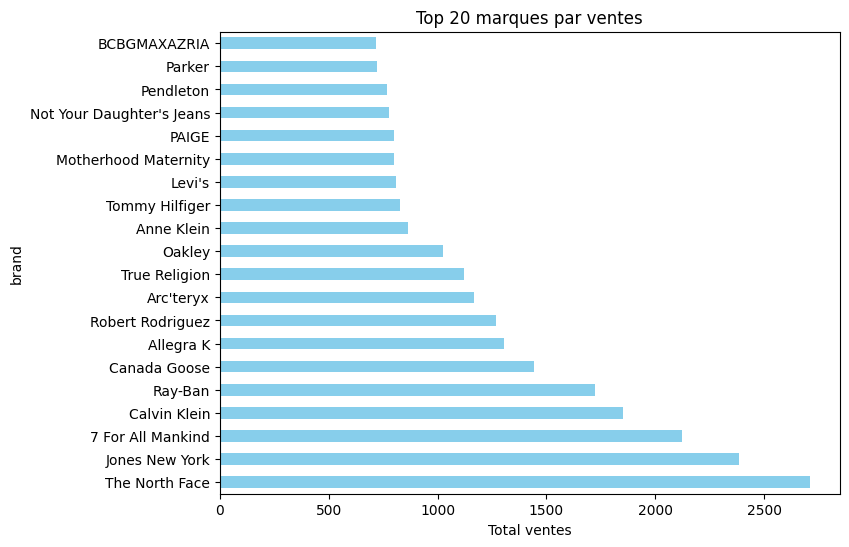

In [28]:
top_brands = df.groupby('brand')['sale_price'].sum().sort_values(ascending=False).head(20)
top_brands.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title("Top 20 marques par ventes")
plt.xlabel("Total ventes")
plt.show()